![Python Logo](./img/python-logo-master-v3-TM-flattened_small.png)

# Financial Programming - IÉSEG, Lille - MBD 2019-2020
## Group Project - Financial Data

In [1]:
first_name = ''
last_name = ''

### Data Exploration

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals()) 
import datetime
%matplotlib inline
import seaborn as sns
from collections import Counter
import sys
import sklearn as sk
from matplotlib import pyplot
from scipy.stats import pearsonr
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics      import auc
from sklearn.metrics      import roc_auc_score
from sklearn.metrics        import accuracy_score
from sklearn.tree           import DecisionTreeClassifier
from sklearn.ensemble       import RandomForestClassifier
from sklearn.ensemble       import GradientBoostingClassifier
from sklearn.svm            import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors      import KNeighborsClassifier
from scipy.stats.mstats   import winsorize
from numpy                import array
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())
from numpy import where
import matplotlib
import matplotlib.pyplot as plt
import datetime
%matplotlib inline
from collections import Counter
import time 



**Input data**

**Account Table**

In [3]:
# Each record describes static characteristics of an account
account = pd.read_csv('C:/Users/oabdelgelil/Desktop/Python GROUP Project/customerloan/Group Project_Customer Loan/data_berka/account.asc', sep=';')
account = account.rename(columns={'district_id': 'account_district_id'})
account.head()

,account_id,account_district_id,frequency,date
0,576,55,POPLATEK MESICNE,930101
1,3818,74,POPLATEK MESICNE,930101
2,704,55,POPLATEK MESICNE,930101
3,2378,16,POPLATEK MESICNE,930101
4,2632,24,POPLATEK MESICNE,930102


In [4]:
#check the data size
account.shape

(4500, 4)

In [5]:
#check missing values
account.info()
account.isna().sum().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 4 columns):
account_id             4500 non-null int64
account_district_id    4500 non-null int64
frequency              4500 non-null object
date                   4500 non-null int64
dtypes: int64(3), object(1)
memory usage: 140.8+ KB


0

In [6]:
#Defining the starting and end dates
start_date = datetime.datetime(1993,1,1)
end_date = datetime.datetime(1999,1,1)
# function to convert a date to (days after start_date)
def convert_date_to_days(x):
    td = x - start_date
    return td.days
# function to convert a date to age at end_date
def convert_to_age_days(x):
    td = end_date - x
    return td.days
# returns the middle two digits

def get_mid2_dig(x):
    return int(x/100) % 100
# returns the month of birth_number column.
def get_month(x):
    mth = get_mid2_dig(x)
    if mth > 50:
        return mth - 50
    else:
        return mth

# return the month (of birth_number)
def get_day(x):
    return x % 100

# returns the year (of birth_number)
def get_year(x):
    return int(x/10000)
def convert_int_to_date(x):
    yr = get_year(x) + 1900
    mth = get_month(x)
    day = get_day(x)
    return datetime.datetime(yr, mth, day)

In [7]:
#Converting date columns in the Account table
account['date'] = account['date'].map(convert_int_to_date)
account['account_date_opened'] = account['date'].map(convert_date_to_days)


In [8]:
account.head()

,account_id,account_district_id,frequency,date,account_date_opened
0,576,55,POPLATEK MESICNE,1993-01-01,0
1,3818,74,POPLATEK MESICNE,1993-01-01,0
2,704,55,POPLATEK MESICNE,1993-01-01,0
3,2378,16,POPLATEK MESICNE,1993-01-01,0
4,2632,24,POPLATEK MESICNE,1993-01-02,1


In [9]:
#Checking the frequency of Account table and convert it to real meanings
account['frequency'].value_counts()
def convert_freq_to_val(x):
    if x == 'POPLATEK MESICNE':
        return 'MONTHLY'
    elif x == 'POPLATEK TYDNE':
        return 'WEEKLY'
    elif x == 'POPLATEK PO OBRATU':
        return 'TRANSACTION'
    else:
        return 'UNKNOWN'
    
account['frequency_statment'] = account['frequency'].map(convert_freq_to_val)

In [10]:
account = account.rename(columns={'date': 'account_date'})
account.head()

,account_id,account_district_id,frequency,account_date,account_date_opened,frequency_statment
0,576,55,POPLATEK MESICNE,1993-01-01,0,MONTHLY
1,3818,74,POPLATEK MESICNE,1993-01-01,0,MONTHLY
2,704,55,POPLATEK MESICNE,1993-01-01,0,MONTHLY
3,2378,16,POPLATEK MESICNE,1993-01-01,0,MONTHLY
4,2632,24,POPLATEK MESICNE,1993-01-02,1,MONTHLY


In [11]:
#converting 'date'
account_year = account.loc[:,"account_date"].astype(str)
account_month = account.loc[:,"account_date"].astype(str)
account_day = account.loc[:,"account_date"].astype(str)

account.loc[:, "account_year"] = account_year.str[:4]
account.loc[:, "account_month"] = account_month.str[5:7]
account.loc[:, "account_day"] = account_day.str[8:10]
account.head()

,account_id,account_district_id,frequency,account_date,account_date_opened,frequency_statment,account_year,account_month,account_day
0,576,55,POPLATEK MESICNE,1993-01-01,0,MONTHLY,1993,01,01
1,3818,74,POPLATEK MESICNE,1993-01-01,0,MONTHLY,1993,01,01
2,704,55,POPLATEK MESICNE,1993-01-01,0,MONTHLY,1993,01,01
3,2378,16,POPLATEK MESICNE,1993-01-01,0,MONTHLY,1993,01,01
4,2632,24,POPLATEK MESICNE,1993-01-02,1,MONTHLY,1993,01,02


**Card Table**

In [12]:
# Each record describes a credit card issued to an account
card = pd.read_csv('C:/Users/oabdelgelil/Desktop/Python GROUP Project/customerloan/Group Project_Customer Loan/data_berka/card.asc', sep=';')
card.head()

,card_id,disp_id,type,issued
0,1005,9285,classic,931107 00:00:00
1,104,588,classic,940119 00:00:00
2,747,4915,classic,940205 00:00:00
3,70,439,classic,940208 00:00:00
4,577,3687,classic,940215 00:00:00


In [13]:
#check the data size
card.shape

(892, 4)

In [14]:
#check missing values
card.info()
card.isna().sum().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 4 columns):
card_id    892 non-null int64
disp_id    892 non-null int64
type       892 non-null object
issued     892 non-null object
dtypes: int64(2), object(2)
memory usage: 28.0+ KB


0

In [15]:
#Defining the start date
start_date = datetime.datetime(1993,1,1)
# created a function to convert a date to (days after the startdate)
def convert_date_to_days(x):
    afterstartdate = x - start_date
    return afterstartdate.days
#Converting the Card issued date to a datetime object
card['issued'] = pd.to_datetime(card['issued'].str[:6], format='%y%m%d')
# check the date column for null values
card['issued'].isnull().sum()
#Convert the card issued date to days in number
card['card_issued_date'] = card['issued'].map(convert_date_to_days)



In [16]:
#the card table after adding the variable card issued date and rename type to card_type
card = card.rename(columns={'type': 'card_type'})
card.head()

,card_id,disp_id,card_type,issued,card_issued_date
0,1005,9285,classic,1993-11-07,310
1,104,588,classic,1994-01-19,383
2,747,4915,classic,1994-02-05,400
3,70,439,classic,1994-02-08,403
4,577,3687,classic,1994-02-15,410


**Client Table**

In [17]:
# Each record describes characteristics of a client
client = pd.read_csv('C:/Users/oabdelgelil/Desktop/Python GROUP Project/customerloan/Group Project_Customer Loan/data_berka/client.asc', sep=';')
client.head()

,client_id,birth_number,district_id
0,1,706213,18
1,2,450204,1
2,3,406009,1
3,4,561201,5
4,5,605703,5


In [18]:
#check the data size
client.shape

(5369, 3)

In [19]:
#check missing values
client.info()
client.isna().sum().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5369 entries, 0 to 5368
Data columns (total 3 columns):
client_id       5369 non-null int64
birth_number    5369 non-null int64
district_id     5369 non-null int64
dtypes: int64(3)
memory usage: 126.0 KB


0

In [20]:
#create birth year and birth day from column birth_number of client table
client['birth_year'] = client['birth_number'].transform(lambda bn: int('19' + str(bn)[:2]))
client['birth_day'] = client['birth_number'].astype(str).str[-2:].astype(int)
client.head()

,client_id,birth_number,district_id,birth_year,birth_day
0,1,706213,18,1970,13
1,2,450204,1,1945,4
2,3,406009,1,1940,9
3,4,561201,5,1956,1
4,5,605703,5,1960,3


In [21]:
#create birth month variable and gender variable
def to_month_gender(birth_number):
    
    s = str(birth_number)
    birth_month = int(s[2:4])
    
    if birth_month > 50:
        gender = "F"
        birth_month = birth_month - 50
    else:
        gender = 'M'
        
    return pd.Series({'birth_month':birth_month, 'gender':gender})

client[['birth_month', 'gender']] = client['birth_number'].apply(to_month_gender)
client.head()

,client_id,birth_number,district_id,birth_year,birth_day,birth_month,gender
0,1,706213,18,1970,13,12,F
1,2,450204,1,1945,4,2,M
2,3,406009,1,1940,9,10,F
3,4,561201,5,1956,1,12,M
4,5,605703,5,1960,3,7,F


In [22]:
#create age variable assuming that the current year is 1999
client['age'] = 1999 - client['birth_year']
client.head()

,client_id,birth_number,district_id,birth_year,birth_day,birth_month,gender,age
0,1,706213,18,1970,13,12,F,29
1,2,450204,1,1945,4,2,M,54
2,3,406009,1,1940,9,10,F,59
3,4,561201,5,1956,1,12,M,43
4,5,605703,5,1960,3,7,F,39


In [23]:
#create an age_group variable that groups age together for every 10 years range, for example
#anyone who has age from 20 to 29 will be grouped as 20
client['age_group'] = client['age'] // 10 * 10
client = client.rename(columns={'district_id': 'client_district_id','gender':'client_gender',
                               'age':'client_age'})
client.head()

,client_id,birth_number,client_district_id,birth_year,birth_day,birth_month,client_gender,client_age,age_group
0,1,706213,18,1970,13,12,F,29,20
1,2,450204,1,1945,4,2,M,54,50
2,3,406009,1,1940,9,10,F,59,50
3,4,561201,5,1956,1,12,M,43,40
4,5,605703,5,1960,3,7,F,39,30


(array([  6., 160., 449., 357., 310., 381., 402., 398., 358., 302., 381.,
        414., 372., 261., 163., 201., 197., 190.,  57.,  10.]),
 array([12. , 15.8, 19.6, 23.4, 27.2, 31. , 34.8, 38.6, 42.4, 46.2, 50. ,
        53.8, 57.6, 61.4, 65.2, 69. , 72.8, 76.6, 80.4, 84.2, 88. ]),
 <a list of 20 Patch objects>)

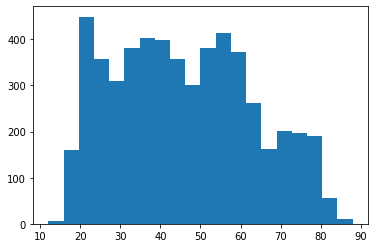

In [24]:
#plotting the age of thr clients 
plt.hist(client['client_age'], 20)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000131257203C8>],
      dtype=object)

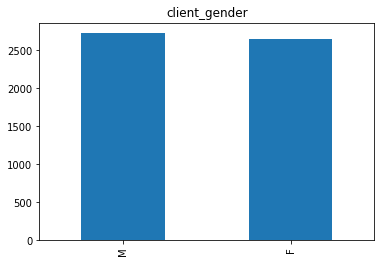

In [25]:
#plotting the gender of the clients
client['client_gender'].value_counts().plot(kind='bar', subplots=True)

In [26]:
client.head()

,client_id,birth_number,client_district_id,birth_year,birth_day,birth_month,client_gender,client_age,age_group
0,1,706213,18,1970,13,12,F,29,20
1,2,450204,1,1945,4,2,M,54,50
2,3,406009,1,1940,9,10,F,59,50
3,4,561201,5,1956,1,12,M,43,40
4,5,605703,5,1960,3,7,F,39,30


**Disposition Table**

In [27]:
# Each record relates together a client with an account i.e. this relation describes the rights
# of clients to operate accounts
disp = pd.read_csv('C:/Users/oabdelgelil/Desktop/Python GROUP Project/customerloan/Group Project_Customer Loan/data_berka/disp.asc', sep=';')
disp = disp.rename(columns={'type': 'disp_type'})
#disp = disp.rename(columns={'account_id': 'disp_account_id'})
disp.head()

,disp_id,client_id,account_id,disp_type
0,1,1,1,OWNER
1,2,2,2,OWNER
2,3,3,2,DISPONENT
3,4,4,3,OWNER
4,5,5,3,DISPONENT


In [28]:
#check the data size
disp.shape

(5369, 4)

In [29]:
#check missing values
disp.info()
disp.isna().sum().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5369 entries, 0 to 5368
Data columns (total 4 columns):
disp_id       5369 non-null int64
client_id     5369 non-null int64
account_id    5369 non-null int64
disp_type     5369 non-null object
dtypes: int64(3), object(1)
memory usage: 167.9+ KB


0

In [30]:
#cleaning disposition table
countypesofdisp = disp['disp_type'].value_counts()
print(countypesofdisp)

OWNER        4500
DISPONENT     869
Name: disp_type, dtype: int64


**Order Table**

In [31]:
# Each record describes characteristics of a payment order
order = pd.read_csv('C:/Users/oabdelgelil/Desktop/Python GROUP Project/customerloan/Group Project_Customer Loan/data_berka/order.asc', sep=';')
order.head()

,order_id,account_id,bank_to,account_to,amount,k_symbol
0,29401,1,YZ,87144583,2452.0,SIPO
1,29402,2,ST,89597016,3372.7,UVER
2,29403,2,QR,13943797,7266.0,SIPO
3,29404,3,WX,83084338,1135.0,SIPO
4,29405,3,CD,24485939,327.0,


In [32]:
#check the data size
order.shape

(6471, 6)

In [33]:
#check missing values
order.info()
order.isna().sum().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6471 entries, 0 to 6470
Data columns (total 6 columns):
order_id      6471 non-null int64
account_id    6471 non-null int64
bank_to       6471 non-null object
account_to    6471 non-null int64
amount        6471 non-null float64
k_symbol      6471 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 303.5+ KB


0

In [34]:
# Dummy encoding + Column name fixing
# Dummy encoding of banks
order = order.join(pd.get_dummies(order['bank_to'], prefix = 'order_bank_Is', drop_first = False))
del order['bank_to']

# Dummy encoding for k_symbol

order = order.join(pd.get_dummies(order['k_symbol'], prefix = 'order_k_Is', drop_first = False))
del order['k_symbol']


order["order_amount"] = order["amount"]
del order["amount"]

order["order_account_to"] = order["account_to"]
del order["account_to"]

new_order = order[[
"account_id",
"order_account_to",
"order_amount",
"order_bank_Is_AB",
"order_bank_Is_CD",
"order_bank_Is_EF",
"order_bank_Is_GH",
"order_bank_Is_IJ",
"order_bank_Is_KL",
"order_bank_Is_MN",
"order_bank_Is_OP",
"order_bank_Is_QR",
"order_bank_Is_ST",
"order_bank_Is_UV",
"order_bank_Is_WX",
"order_bank_Is_YZ",
"order_k_Is_LEASING",
"order_k_Is_POJISTNE",
"order_k_Is_SIPO",
"order_k_Is_UVER"]]


order = pysqldf("""

SELECT 

account_id, 
SUM(order_amount) as order_SUM_amount, 
COUNT(order_amount) as order_count, 
SUM("bank_Is_AB") as order_bank_Is_AB,
SUM("bank_Is_CD") as order_bank_Is_CD,
SUM("bank_Is_EF") as order_bank_Is_EF,
SUM("bank_Is_GH") as order_bank_Is_GH,
SUM("bank_Is_IJ") as order_bank_Is_IJ,
SUM("bank_Is_KL") as order_bank_Is_KL,
SUM("bank_Is_MN") as order_bank_Is_MN,
SUM("bank_Is_OP") as order_bank_Is_OP,
SUM("bank_Is_QR") as order_bank_Is_QR,
SUM("bank_Is_ST") as order_bank_Is_ST,
SUM("bank_Is_UV") as order_bank_Is_UV,
SUM("bank_Is_WX") as order_bank_Is_WX,
SUM("bank_Is_YZ") as order_bank_Is_YZ,
SUM("k_Is_LEASING") as order_k_Is_LEASING,
SUM("k_Is_POJISTNE") as order_k_Is_POJISTNE,
SUM("k_Is_SIPO") as order_k_IS_SIPO,
SUM("k_Is_UVER") as order_k_Is_UVER

FROM new_order

GROUP BY account_id
""")

In [35]:
order.head()

,account_id,order_SUM_amount,order_count,order_bank_Is_AB,order_bank_Is_CD,order_bank_Is_EF,order_bank_Is_GH,order_bank_Is_IJ,order_bank_Is_KL,order_bank_Is_MN,order_bank_Is_OP,order_bank_Is_QR,order_bank_Is_ST,order_bank_Is_UV,order_bank_Is_WX,order_bank_Is_YZ,order_k_Is_LEASING,order_k_Is_POJISTNE,order_k_IS_SIPO,order_k_Is_UVER
0,1,2452.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,10638.7,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,5001.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,3363.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,2668.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Transaction Table**

In [36]:
# Each record describes one transaction on an account
trans = pd.read_csv('C:/Users/oabdelgelil/Desktop/Python GROUP Project/customerloan/Group Project_Customer Loan/data_berka/trans.asc', sep=';', low_memory=False)
trans.head()

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
0,695247,2378,930101,PRIJEM,VKLAD,700.0,700.0,NaN,NaN,NaN
1,171812,576,930101,PRIJEM,VKLAD,900.0,900.0,NaN,NaN,NaN
2,207264,704,930101,PRIJEM,VKLAD,1000.0,1000.0,NaN,NaN,NaN
3,1117247,3818,930101,PRIJEM,VKLAD,600.0,600.0,NaN,NaN,NaN
4,579373,1972,930102,PRIJEM,VKLAD,400.0,400.0,NaN,NaN,NaN


In [37]:
#check the data size
trans.shape

(1056320, 10)

In [38]:
#check missing values
#the NAN values represent the transactions that are withdrawn and therefore there is 
#no bank or account that the money is going to
trans.info()
trans.isna().sum().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056320 entries, 0 to 1056319
Data columns (total 10 columns):
trans_id      1056320 non-null int64
account_id    1056320 non-null int64
date          1056320 non-null int64
type          1056320 non-null object
operation     873206 non-null object
amount        1056320 non-null float64
balance       1056320 non-null float64
k_symbol      574439 non-null object
bank          273508 non-null object
account       295389 non-null float64
dtypes: float64(3), int64(3), object(4)
memory usage: 80.6+ MB


2208738

In [39]:
trans["type"] = where(trans["type"] == 'PRIJEM','Credit', trans["type"])
trans["type"] = where(trans["type"] == 'VYDAJ','Withdraw', trans["type"])

trans["operation"] = where(trans["operation"] == 'VYBER KARTOU','Credit card withdrawal', trans["operation"])
trans["operation"] = where(trans["operation"] == 'VKLAD','Credit in cash', trans["operation"])
trans["operation"] = where(trans["operation"] == 'PREVOD Z UCTU','Collection from another bank', trans["operation"])
trans["operation"] = where(trans["operation"] == 'VYBER','Withdrawal in Cash', trans["operation"])
trans["operation"] = where(trans["operation"] == 'PREVOD NA UCET','Remittance to another bank', trans["operation"])

trans["k_symbol"] = where(trans["k_symbol"] == 'POJISTNE','Insurance payment', trans["k_symbol"])
trans["k_symbol"] = where(trans["k_symbol"] == 'SLUZBY','Payment for statement', trans["k_symbol"])
trans["k_symbol"] = where(trans["k_symbol"] == 'UROK','Interest credited', trans["k_symbol"])
trans["k_symbol"] = where(trans["k_symbol"] == 'SANKC. UROK','Sanction interest if negative balance', trans["k_symbol"])
trans["k_symbol"] = where(trans["k_symbol"] == 'SIPO','Household', trans["k_symbol"])
trans["k_symbol"] = where(trans["k_symbol"] == 'DUCHOD','Old-age pension', trans["k_symbol"])
trans["k_symbol"] = where(trans["k_symbol"] == 'UVER','Loan payment', trans["k_symbol"])

# converts date format from integer
trans['date'] = pd.to_datetime(trans['date'], format='%y%m%d')

trans.head()

trans.info()

# replace 'NaN' with 'Unknown' for further plots
trans.k_symbol.fillna('Unknown_k_symbol', inplace = True)
trans.bank.fillna('Unknown_bank', inplace = True)
trans.account.fillna('Unknown_account', inplace = True)
trans.operation.fillna('Unknown_operation', inplace = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056320 entries, 0 to 1056319
Data columns (total 10 columns):
trans_id      1056320 non-null int64
account_id    1056320 non-null int64
date          1056320 non-null datetime64[ns]
type          1056320 non-null object
operation     873206 non-null object
amount        1056320 non-null float64
balance       1056320 non-null float64
k_symbol      574439 non-null object
bank          273508 non-null object
account       295389 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 80.6+ MB


In [40]:
trans.head()

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
0,695247,2378,1993-01-01,Credit,Credit in cash,700.0,700.0,Unknown_k_symbol,Unknown_bank,Unknown_account
1,171812,576,1993-01-01,Credit,Credit in cash,900.0,900.0,Unknown_k_symbol,Unknown_bank,Unknown_account
2,207264,704,1993-01-01,Credit,Credit in cash,1000.0,1000.0,Unknown_k_symbol,Unknown_bank,Unknown_account
3,1117247,3818,1993-01-01,Credit,Credit in cash,600.0,600.0,Unknown_k_symbol,Unknown_bank,Unknown_account
4,579373,1972,1993-01-02,Credit,Credit in cash,400.0,400.0,Unknown_k_symbol,Unknown_bank,Unknown_account


In [41]:
#creating bins based on the amount value
trans['bin_amount'] = pd.cut(trans["amount"],[0,100,1000,5000,10000,100000])
print(trans.groupby("bin_amount").size())

bin_amount
(0, 100]           225242
(100, 1000]        211399
(1000, 5000]       283155
(5000, 10000]      139705
(10000, 100000]    196805
dtype: int64


In [42]:
#set the the transtype "Unknown value" to Withdrawl 
trans.groupby(['operation','type']).count()

trans_id  account_id    date  amount  \
operation                    type                                             
Collection from another bank Credit       65226       65226   65226   65226   
Credit card withdrawal       Withdraw      8036        8036    8036    8036   
Credit in cash               Credit      156743      156743  156743  156743   
Remittance to another bank   Withdraw    208283      208283  208283  208283   
Unknown_operation            Credit      183114      183114  183114  183114   
Withdrawal in Cash           VYBER        16666       16666   16666   16666   
                             Withdraw    418252      418252  418252  418252   

                                       balance  k_symbol    bank  account  \
operation                    type                                           
Collection from another bank Credit      65226     65226   65226    65226   
Credit card withdrawal       Withdraw     8036      8036    8036     8036   
Credit in cash               Credit     156743    156743  156743   156743   
Remittance to another bank   Withdraw   208283    208283  208283   208283   
Unknown_operation            Credit     183114    183114  183114   183114   
Withdrawal in Cash           VYBER       16666     16666   16666    16666   
                             Withdraw   418252    418252  418252   418252   

                                       bin_amount  
operation                    type                  
Collection from another bank Credit         65226  
Credit card withdrawal       Withdraw        8036  
Credit in cash               Credit        156743  
Remittance to another bank   Withdraw      208283  
Unknown_operation            Credit        183110  
Withdrawal in Cash           VYBER          16666  
                             Withdraw      418242

In [43]:
#updating values of type to WITHDRAW where the transtype is VYBER
trans.loc[trans['type'] == 'VYBER', 'type'] = 'Withdraw'

In [44]:
trans["fin_balance"] = where(trans["operation"] == 'VYBER KARTOU','Credit card withdrawal', trans["operation"])

In [45]:
result = trans.groupby(['account_id','type']).sum()

In [46]:
result.head()

trans_id     amount     balance
account_id type                                      
1          Credit    158874268   194320.5   1728938.4
           Withdraw      19363   180854.0   2093629.6
2          Credit    247166544  1597053.5   6223002.8
           Withdraw     181792  1554425.8  11243453.9
3          Credit     63575216   173059.0   1312914.3

In [47]:
trans["credit_result"] = where(trans['type'] == 'Credit',trans['trans_id'],0)

In [48]:
trans["withdraw_result"] = where(trans['type'] == 'Withdraw',trans['trans_id'],0)

In [49]:
trans["final_result"] = trans["credit_result"] - trans["withdraw_result"]

In [50]:
trans.head()

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account,bin_amount,fin_balance,credit_result,withdraw_result,final_result
0,695247,2378,1993-01-01,Credit,Credit in cash,700.0,700.0,Unknown_k_symbol,Unknown_bank,Unknown_account,"(100, 1000]",Credit in cash,695247,0,695247
1,171812,576,1993-01-01,Credit,Credit in cash,900.0,900.0,Unknown_k_symbol,Unknown_bank,Unknown_account,"(100, 1000]",Credit in cash,171812,0,171812
2,207264,704,1993-01-01,Credit,Credit in cash,1000.0,1000.0,Unknown_k_symbol,Unknown_bank,Unknown_account,"(100, 1000]",Credit in cash,207264,0,207264
3,1117247,3818,1993-01-01,Credit,Credit in cash,600.0,600.0,Unknown_k_symbol,Unknown_bank,Unknown_account,"(100, 1000]",Credit in cash,1117247,0,1117247
4,579373,1972,1993-01-02,Credit,Credit in cash,400.0,400.0,Unknown_k_symbol,Unknown_bank,Unknown_account,"(100, 1000]",Credit in cash,579373,0,579373


In [51]:
#minimum and maximum value of transaction date is 1993-01-01 and 1998-12-31

#Splitting for First 3 years & last 3 years
trans.loc[trans['date'] <= "1995-01-01", 'trans_date_recency_status'] = 'First_3_years_trans'
trans.loc[trans['date'] >= "1995-01-01", 'trans_date_recency_status'] = 'Last_3_years_trans'

In [52]:
#Calculating Mean Balance in Transaction table
mean_balance_trans =trans.groupby(['account_id'],as_index=False)['balance'].mean()

#Calculating mean of the Amount in Transaction table
mean_amount =trans.groupby(['account_id'],as_index=False)['amount'].mean()

In [53]:
# Frequency calcualtion for amount transacted from a particular account 
transaction_freq =trans.groupby(['account_id'],as_index=False)['trans_id'].count()
transaction_freq=transaction_freq.rename(columns= {'trans_id': 'freq_total_trans'})

In [54]:
# Frequency calcualtion for amount transacted from a particular account in first three and last 3 years
trans_freq=trans.groupby(['account_id','trans_date_recency_status']).size().rename('count').reset_index()
freq_first_3_years_trans=trans_freq.loc[trans_freq['trans_date_recency_status'] == 'First_3_years_trans']
freq_last_3_years_trans=trans_freq.loc[trans_freq['trans_date_recency_status'] == 'Last_3_years_trans']

#Rename columns
freq_first_3_years_trans=freq_first_3_years_trans.rename(columns= {'count': 'freq_first_3_years_trans'})
freq_last_3_years_trans=freq_last_3_years_trans.rename(columns= {'count': 'freq_last_3_years_trans'})


In [55]:
#Frequency of the amount either withdrawn or credited from a account
credit=trans.groupby(['account_id','type']).size().rename('count').reset_index()
freq_trans_credit= credit.loc[credit['type'] == 'Credit']
freq_trans_withdrawl= credit.loc[credit['type'] == 'Withdraw']

#Rename columns
freq_trans_credit=freq_trans_credit.rename(columns= {'count': 'freq_credit_trans'})
freq_trans_withdrawl=freq_trans_withdrawl.rename(columns= {'count': 'freq_withdrawl_trans'})


In [56]:
#latest transaction done: calculating the difference in number of days
max_date =trans.groupby(['account_id'],as_index=False)['date'].max()
trans_freq_date = datetime.datetime(year=1999, day=1, month=1)
max_date['latest_trans_days']= trans_freq_date-max_date[['date']]

In [57]:
#Merge the above tables and name it trans_rfm

trans_rfm=pd.merge(mean_balance_trans, transaction_freq, on='account_id', how='left')
trans_rfm=pd.merge(trans_rfm, mean_amount, on='account_id', how='left')
trans_rfm=pd.merge(trans_rfm, freq_first_3_years_trans, on='account_id', how='left')
trans_rfm=pd.merge(trans_rfm, freq_last_3_years_trans, on='account_id', how='left')
trans_rfm=pd.merge(trans_rfm, freq_trans_credit, on='account_id', how='left')
trans_rfm=pd.merge(trans_rfm, freq_trans_withdrawl, on='account_id', how='left')
trans_rfm=pd.merge(trans_rfm, max_date, on='account_id', how='left')

In [58]:
# Drop Unrelevant Columns:
trans_rfm=trans_rfm.drop(['trans_date_recency_status_x','trans_date_recency_status_y','date','type_x','type_y',], axis=1)

In [59]:
# Fix the name of the columns

trans_rfm["trans_balance"] = trans_rfm["balance"]
trans_rfm["trans_freq_total"] = trans_rfm["freq_total_trans"]
trans_rfm["trans_amount"] = trans_rfm["amount"]
trans_rfm["trans_freq_first_3_years"] = trans_rfm["freq_first_3_years_trans"]
trans_rfm["trans_freq_last_3_years"] = trans_rfm["freq_last_3_years_trans"]
trans_rfm["trans_freq_credit"] = trans_rfm["freq_credit_trans"]
trans_rfm["trans_freq_withdraw"] = trans_rfm["freq_withdrawl_trans"]
trans_rfm["trans_last_in_days"]= trans_rfm["latest_trans_days"]

del trans_rfm["balance"]
del trans_rfm["freq_total_trans"]
del trans_rfm["amount"]
del trans_rfm["freq_first_3_years_trans"]
del trans_rfm["freq_last_3_years_trans"]
del trans_rfm["freq_credit_trans"]
del trans_rfm["freq_withdrawl_trans"]
del trans_rfm["latest_trans_days"]

trans_rfm.head()

,account_id,trans_balance,trans_freq_total,trans_amount,trans_freq_first_3_years,trans_freq_last_3_years,trans_freq_credit,trans_freq_withdraw,trans_last_in_days
0,1,15994.008368,239,1569.767782,NaN,239,102,137,1 days
1,2,36540.704393,478,6593.052929,139.0,339,152,326,1 days
2,3,26973.506838,117,2521.553846,NaN,117,46,71,1 days
3,4,21753.446237,186,1886.943011,NaN,186,65,121,1 days
4,5,25090.069048,84,1986.683333,NaN,84,35,49,1 days


**Loan Table**

In [60]:
# Each record describes a loan granted for a given account
loan = pd.read_csv('C:/Users/oabdelgelil/Desktop/Python GROUP Project/customerloan/Group Project_Customer Loan/data_berka/loan.asc', sep=';')
loan.head()

,loan_id,account_id,date,amount,duration,payments,status
0,5314,1787,930705,96396,12,8033.0,B
1,5316,1801,930711,165960,36,4610.0,A
2,6863,9188,930728,127080,60,2118.0,A
3,5325,1843,930803,105804,36,2939.0,A
4,7240,11013,930906,274740,60,4579.0,A


In [61]:
#check the data size
loan.shape

(682, 7)

In [62]:
#check missing values
loan.info()
loan.isna().sum().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 7 columns):
loan_id       682 non-null int64
account_id    682 non-null int64
date          682 non-null int64
amount        682 non-null int64
duration      682 non-null int64
payments      682 non-null float64
status        682 non-null object
dtypes: float64(1), int64(5), object(1)
memory usage: 37.4+ KB


0

In [63]:
#cleaning loan table
# convert loan date to integer
def get_year(x):
    return int(x/10000)

def get_mid2_dig(x):
    return int(x/100) % 100

def get_month(x):
    mth = get_mid2_dig(x)
    if mth > 50:
        return mth - 50
    else:
        return mth

def get_day(x):
    return x % 100

def convert_int_to_date(x):
    yr = get_year(x) + 1900
    mth = get_month(x)
    day = get_day(x)
    return datetime.datetime(yr, mth, day)
loan['date'] = loan['date'].map(convert_int_to_date)

In [64]:
#recheck the loan table
loan.head()

,loan_id,account_id,date,amount,duration,payments,status
0,5314,1787,1993-07-05,96396,12,8033.0,B
1,5316,1801,1993-07-11,165960,36,4610.0,A
2,6863,9188,1993-07-28,127080,60,2118.0,A
3,5325,1843,1993-08-03,105804,36,2939.0,A
4,7240,11013,1993-09-06,274740,60,4579.0,A


In [65]:
#convert a date to days after start_date.
start_date = datetime.datetime(1993,1,1)
def convert_date_to_days(x):
    result = x - start_date
    return result.days

loan['num_days_since_loan_acquired'] = loan['date'].map(convert_date_to_days)

In [66]:
#recheck the loan table
loan = loan.rename(columns={'amount': 'loan_amount', 'duration':'loan_duration', 'payments':'monthly_loan_payment', 'status':'loan_status'})
loan.head()

,loan_id,account_id,date,loan_amount,loan_duration,monthly_loan_payment,loan_status,num_days_since_loan_acquired
0,5314,1787,1993-07-05,96396,12,8033.0,B,185
1,5316,1801,1993-07-11,165960,36,4610.0,A,191
2,6863,9188,1993-07-28,127080,60,2118.0,A,208
3,5325,1843,1993-08-03,105804,36,2939.0,A,214
4,7240,11013,1993-09-06,274740,60,4579.0,A,248


**District table**

In [67]:
# Each record describes demographic characteristics of a district.
district = pd.read_csv('C:/Users/oabdelgelil/Desktop/Python GROUP Project/customerloan/Group Project_Customer Loan/data_berka/district.asc', sep=';')
district.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.29,0.43,167,85677,99107
1,2,Benesov,central Bohemia,88884,80,26,6,2,5,46.7,8507,1.67,1.85,132,2159,2674
2,3,Beroun,central Bohemia,75232,55,26,4,1,5,41.7,8980,1.95,2.21,111,2824,2813
3,4,Kladno,central Bohemia,149893,63,29,6,2,6,67.4,9753,4.64,5.05,109,5244,5892
4,5,Kolin,central Bohemia,95616,65,30,4,1,6,51.4,9307,3.85,4.43,118,2616,3040


In [68]:
#check the data size
district.shape

(77, 16)

In [69]:
#check missing values
district.info()
district.isna().sum().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
A1     77 non-null int64
A2     77 non-null object
A3     77 non-null object
A4     77 non-null int64
A5     77 non-null int64
A6     77 non-null int64
A7     77 non-null int64
A8     77 non-null int64
A9     77 non-null int64
A10    77 non-null float64
A11    77 non-null int64
A12    77 non-null object
A13    77 non-null float64
A14    77 non-null int64
A15    77 non-null object
A16    77 non-null int64
dtypes: float64(2), int64(10), object(4)
memory usage: 9.8+ KB


0

In [70]:
#changing the columns names of the district date
district = district.rename(columns={'A1':'district_id','A2':'district_name','A3':'region','A4':'no_of_inhabitants',
                                   'A5':'no._of_municipalities_with_inhabitants < 499',
                                   'A6':'no._of_municipalities_with_inhabitants_500-1999',
                                   'A7':'no._of_municipalities_with_inhabitants_2000-9999',
                                   'A8':'no._of_municipalities_with_inhabitants >10000',
                                   'A9':'no._of_cities',
                                   'A10':'ratio of urban inhabitants',
                                   'A11':'average salary',
                                   'A12':'unemploymant rate "95"',
                                   'A13':'unemploymant rate "96"',
                                   'A14':'no._of_enterpreneurs_per_1000_inhabitants',
                                   'A15':'no._of_commited_crimes "95"',
                                   'A16':'no._of_commited_crimes "96"'})

In [71]:
district.head()

,district_id,district_name,region,no_of_inhabitants,no._of_municipalities_with_inhabitants < 499,no._of_municipalities_with_inhabitants_500-1999,no._of_municipalities_with_inhabitants_2000-9999,no._of_municipalities_with_inhabitants >10000,no._of_cities,ratio of urban inhabitants,average salary,"unemploymant rate ""95""","unemploymant rate ""96""",no._of_enterpreneurs_per_1000_inhabitants,"no._of_commited_crimes ""95""","no._of_commited_crimes ""96"""
0,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.29,0.43,167,85677,99107
1,2,Benesov,central Bohemia,88884,80,26,6,2,5,46.7,8507,1.67,1.85,132,2159,2674
2,3,Beroun,central Bohemia,75232,55,26,4,1,5,41.7,8980,1.95,2.21,111,2824,2813
3,4,Kladno,central Bohemia,149893,63,29,6,2,6,67.4,9753,4.64,5.05,109,5244,5892
4,5,Kolin,central Bohemia,95616,65,30,4,1,6,51.4,9307,3.85,4.43,118,2616,3040


In [72]:
#cleaning the table
#unemp_rate_95 and num_crimes95 can't be object.
print(district.dtypes)

district_id                                           int64
district_name                                        object
region                                               object
no_of_inhabitants                                     int64
no._of_municipalities_with_inhabitants < 499          int64
no._of_municipalities_with_inhabitants_500-1999       int64
no._of_municipalities_with_inhabitants_2000-9999      int64
no._of_municipalities_with_inhabitants >10000         int64
no._of_cities                                         int64
ratio of urban inhabitants                          float64
average salary                                        int64
unemploymant rate "95"                               object
unemploymant rate "96"                              float64
no._of_enterpreneurs_per_1000_inhabitants             int64
no._of_commited_crimes "95"                          object
no._of_commited_crimes "96"                           int64
dtype: object


In [73]:
#There is a '?' mark on no._of_commited_crimes "95" column. 
district['no._of_commited_crimes "95"'].unique()

array(['85677', '2159', '2824', '5244', '2616', '2640', '4289', '5179',
       '2987', '3810', '3475', '3804', '1597', '6604', '1845', '1874',
       '1003', '1740', '999', '1563', '2299', '1089', '2879', '5198',
       '1822', '6041', '1029', '1580', '818', '2985', '1328', '4340',
       '4650', '5323', '3384', '5796', '4147', '2653', '4947', '6949',
       '6445', '1658', '4085', '2166', '2080', '2854', '6079', '1655',
       '1660', '2123', '3496', '2564', '1850', '18721', '3659', '3729',
       '2212', '2595', '1879', '2112', '2719', '1562', '4484', '2157',
       '2247', '3244', '5623', '?', '9878', '4980', '9672', '4355',
       '18782', '4063', '3736', '3460'], dtype=object)

In [74]:
# replace the ? with -1
def replacewrongdata(x, typ):
    if x == '?':
        return -1
    elif typ == 'float':
        return float(x)
    else:
        return int(x)
#change the data type of the columns with float that we mentioned    
district['unemploymant rate "95"'] = district['unemploymant rate "95"'].apply(replacewrongdata, args=('float',))
district['no._of_commited_crimes "95"'] = district['no._of_commited_crimes "95"'].apply(
replacewrongdata, args=('int',))

In [75]:
#recheck after modifications
print(district.dtypes)
district['no._of_commited_crimes "95"'].unique()

district_id                                           int64
district_name                                        object
region                                               object
no_of_inhabitants                                     int64
no._of_municipalities_with_inhabitants < 499          int64
no._of_municipalities_with_inhabitants_500-1999       int64
no._of_municipalities_with_inhabitants_2000-9999      int64
no._of_municipalities_with_inhabitants >10000         int64
no._of_cities                                         int64
ratio of urban inhabitants                          float64
average salary                                        int64
unemploymant rate "95"                              float64
unemploymant rate "96"                              float64
no._of_enterpreneurs_per_1000_inhabitants             int64
no._of_commited_crimes "95"                           int64
no._of_commited_crimes "96"                           int64
dtype: object


array([85677,  2159,  2824,  5244,  2616,  2640,  4289,  5179,  2987,
        3810,  3475,  3804,  1597,  6604,  1845,  1874,  1003,  1740,
         999,  1563,  2299,  1089,  2879,  5198,  1822,  6041,  1029,
        1580,   818,  2985,  1328,  4340,  4650,  5323,  3384,  5796,
        4147,  2653,  4947,  6949,  6445,  1658,  4085,  2166,  2080,
        2854,  6079,  1655,  1660,  2123,  3496,  2564,  1850, 18721,
        3659,  3729,  2212,  2595,  1879,  2112,  2719,  1562,  4484,
        2157,  2247,  3244,  5623,    -1,  9878,  4980,  9672,  4355,
       18782,  4063,  3736,  3460], dtype=int64)

**Merging Tables**

In [76]:
#Merging the tables except trans and orders
basetable = client.merge(disp, how='outer', left_on='client_id', right_on='client_id')
basetable = basetable.merge(account, how='outer', left_on='account_id', right_on='account_id')
basetable = basetable.merge(loan, how='outer', left_on='account_id', right_on='account_id')
basetable = basetable.merge(disp, how='outer', left_on='disp_id', right_on='disp_id')
basetable = basetable.merge(card, how='outer', left_on='disp_id', right_on='disp_id')
basetable = basetable.merge(district, how='outer', left_on='client_district_id', right_on='district_id')
#print(list(basetable))
basetable = basetable.rename(columns={'account_id_y': 'account_id_disp'})
print(list(basetable))

['client_id_x', 'birth_number', 'client_district_id', 'birth_year', 'birth_day', 'birth_month', 'client_gender', 'client_age', 'age_group', 'disp_id', 'account_id_x', 'disp_type_x', 'account_district_id', 'frequency', 'account_date', 'account_date_opened', 'frequency_statment', 'account_year', 'account_month', 'account_day', 'loan_id', 'date', 'loan_amount', 'loan_duration', 'monthly_loan_payment', 'loan_status', 'num_days_since_loan_acquired', 'client_id_y', 'account_id_disp', 'disp_type_y', 'card_id', 'card_type', 'issued', 'card_issued_date', 'district_id', 'district_name', 'region', 'no_of_inhabitants', 'no._of_municipalities_with_inhabitants < 499', 'no._of_municipalities_with_inhabitants_500-1999', 'no._of_municipalities_with_inhabitants_2000-9999', 'no._of_municipalities_with_inhabitants >10000', 'no._of_cities', 'ratio of urban inhabitants', 'average salary', 'unemploymant rate "95"', 'unemploymant rate "96"', 'no._of_enterpreneurs_per_1000_inhabitants', 'no._of_commited_crimes

In [77]:
basetable.head()

,client_id_x,birth_number,client_district_id,birth_year,birth_day,birth_month,client_gender,client_age,age_group,disp_id,...,no._of_municipalities_with_inhabitants_2000-9999,no._of_municipalities_with_inhabitants >10000,no._of_cities,ratio of urban inhabitants,average salary,"unemploymant rate ""95""","unemploymant rate ""96""",no._of_enterpreneurs_per_1000_inhabitants,"no._of_commited_crimes ""95""","no._of_commited_crimes ""96"""
0,1,706213,18,1970,13,12,F,29,20,1,...,2,1,4,65.3,8968,2.83,3.35,131,1740,1910
1,420,780313,18,1978,13,3,M,21,20,420,...,2,1,4,65.3,8968,2.83,3.35,131,1740,1910
2,499,355708,18,1935,8,7,F,64,60,499,...,2,1,4,65.3,8968,2.83,3.35,131,1740,1910
3,519,800413,18,1980,13,4,M,19,10,519,...,2,1,4,65.3,8968,2.83,3.35,131,1740,1910
4,682,791021,18,1979,21,10,M,20,20,682,...,2,1,4,65.3,8968,2.83,3.35,131,1740,1910


In [78]:
# after exporting to csv, i needed to modify some column names like the first column
#basetable.to_csv('C:/Users/oabdelgelil/Desktop/testbasetable/basetablev2.csv', header=True, sep=',') 

basetable.columns = basetable.columns.str.replace(r'_x', '')
basetable.columns = basetable.columns.str.replace(r'_y', '')
basetable.columns = basetable.columns.str.replace(r' ', '_')

final_colnames = list(basetable) 
basetable.head()
print(list(basetable))

['client_id', 'birth_number', 'client_district_id', 'birthear', 'birth_day', 'birth_month', 'client_gender', 'client_age', 'age_group', 'disp_id', 'account_id', 'disp_type', 'account_district_id', 'frequency', 'account_date', 'account_date_opened', 'frequency_statment', 'accountear', 'account_month', 'account_day', 'loan_id', 'date', 'loan_amount', 'loan_duration', 'monthly_loan_payment', 'loan_status', 'num_days_since_loan_acquired', 'client_id', 'account_id_disp', 'disp_type', 'card_id', 'card_type', 'issued', 'card_issued_date', 'district_id', 'district_name', 'region', 'no_of_inhabitants', 'no._of_municipalities_with_inhabitants_<_499', 'no._of_municipalities_with_inhabitants_500-1999', 'no._of_municipalities_with_inhabitants_2000-9999', 'no._of_municipalities_with_inhabitants_>10000', 'no._of_cities', 'ratio_of_urban_inhabitants', 'average_salary', 'unemploymant_rate_"95"', 'unemploymant_rate_"96"', 'no._of_enterpreneurs_per_1000_inhabitants', 'no._of_commited_crimes_"95"', 'no._o

In [79]:
#merge order and transaction tables together 
trans_order_merged = trans_rfm.merge(order, how='outer', left_on='account_id', right_on='account_id')

In [80]:
trans_order_merged.head()


,account_id,trans_balance,trans_freq_total,trans_amount,trans_freq_first_3_years,trans_freq_last_3_years,trans_freq_credit,trans_freq_withdraw,trans_last_in_days,order_SUM_amount,...,order_bank_Is_OP,order_bank_Is_QR,order_bank_Is_ST,order_bank_Is_UV,order_bank_Is_WX,order_bank_Is_YZ,order_k_Is_LEASING,order_k_Is_POJISTNE,order_k_IS_SIPO,order_k_Is_UVER
0,1,15994.008368,239,1569.767782,NaN,239,102,137,1 days,2452.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,36540.704393,478,6593.052929,139.0,339,152,326,1 days,10638.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,26973.506838,117,2521.553846,NaN,117,46,71,1 days,5001.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,21753.446237,186,1886.943011,NaN,186,65,121,1 days,3363.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,25090.069048,84,1986.683333,NaN,84,35,49,1 days,2668.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
basetable_final = basetable.merge(trans_order_merged, how='outer', left_on='account_id', right_on='account_id')
basetable_final.head()
basetable_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5369 entries, 0 to 5368
Data columns (total 77 columns):
client_id                                           5369 non-null int64
birth_number                                        5369 non-null int64
client_district_id                                  5369 non-null int64
birthear                                            5369 non-null int64
birth_day                                           5369 non-null int32
birth_month                                         5369 non-null int64
client_gender                                       5369 non-null object
client_age                                          5369 non-null int64
age_group                                           5369 non-null int64
disp_id                                             5369 non-null int64
account_id                                          5369 non-null int64
disp_type                                           5369 non-null object
account_district_id        

In [82]:
basetable_final.to_csv('C:/Users/oabdelgelil/Desktop/testbasetable/basetable_final.csv', header=True, sep=',') 


**GRAPHS**

0         Hl.m. Praha
53       Brno - mesto
73    Ostrava - mesto
69            Karvina
67    Frydek - Mistek
Name: district_name, dtype: object


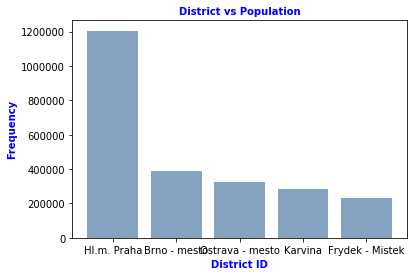

In [83]:
#distirct id and population
f = plt.figure(1)
to_plot = district.sort_values(by='no_of_inhabitants', ascending=False)[:5]
y = to_plot['no_of_inhabitants']
x = to_plot['district_name'].astype(str)
print(x)
plt.bar(x, y, color=(0.2, 0.4, 0.6, 0.6))
# Custom Axis title
plt.xlabel('District ID', fontweight='bold', color = 'blue', fontsize='10', horizontalalignment='center')
plt.ylabel('Frequency', fontweight='bold', color = 'blue', fontsize='10', horizontalalignment='center')
plt.title('District vs Population', fontweight='bold', color = 'blue', fontsize='10', horizontalalignment='center')
plt.savefig('fig_'+str('district_avgsal_pop1')+'.png', dpi=200)
plt.show()

0         Hl.m. Praha
7      Mlada Boleslav
25      Plzen - mesto
73    Ostrava - mesto
38               Most
Name: district_name, dtype: object


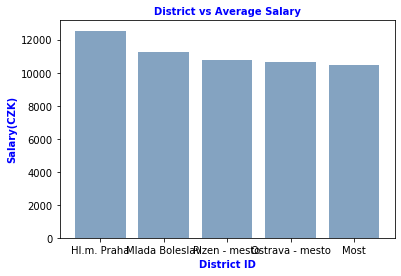

In [84]:
#district_id and avg_salary 
g = plt.figure(2)
to_plot = district.sort_values(by='average salary',ascending = False)[:5]
y = to_plot['average salary']
x = to_plot['district_name'].astype(str)
print(x)
plt.bar(x, y, color=(0.2, 0.4, 0.6, 0.6))
# Custom Axis title
plt.xlabel('District ID', fontweight='bold', color = 'blue', fontsize='10', horizontalalignment='center')
plt.ylabel('Salary(CZK)', fontweight='bold', color = 'blue', fontsize='10', horizontalalignment='center')
plt.title('District vs Average Salary',fontweight='bold', color = 'blue', fontsize='10', horizontalalignment='center')
plt.savefig('fig_'+str('district_avgsal_pop2')+'.png', dpi=200)
plt.show()

66      Bruntal
16    Pelhrimov
68      Jesenik
49      Svitavy
48       Semily
Name: district_name, dtype: object


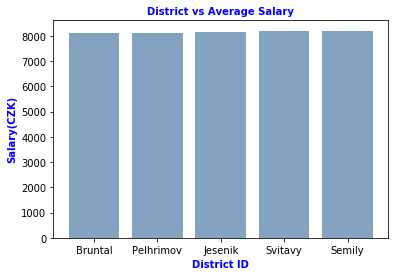

In [85]:
#district_id and avg_salary bottom 5
g = plt.figure(2)
to_plot = district.sort_values(by='average salary',ascending = True)[:5]
y = to_plot['average salary']
x = to_plot['district_name'].astype(str)
print(x)
plt.bar(x, y, color=(0.2, 0.4, 0.6, 0.6))
# Custom Axis title
plt.xlabel('District ID', fontweight='bold', color = 'blue', fontsize='10', horizontalalignment='center')
plt.ylabel('Salary(CZK)', fontweight='bold', color = 'blue', fontsize='10', horizontalalignment='center')
plt.title('District vs Average Salary',fontweight='bold', color = 'blue', fontsize='10', horizontalalignment='center')
plt.savefig('fig_'+str('district_avgsal_pop2')+'.png', dpi=200)
plt.show()

0         Hl.m. Praha
25      Plzen - mesto
73    Ostrava - mesto
53       Brno - mesto
69            Karvina
Name: district_name, dtype: object


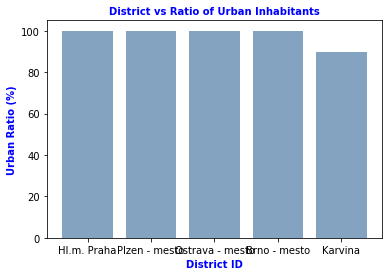

In [86]:
#urban ratio and district id
to_plot = district.sort_values(by='ratio of urban inhabitants',ascending = False)[:5]
y = to_plot['ratio of urban inhabitants']
x = to_plot['district_name'].astype(str)
print(x)
plt.bar(x, y, color=(0.2, 0.4, 0.6, 0.6))
#plt.xlim(1, 80)
# Custom Axis title
plt.xlabel('District ID', fontweight='bold', color = 'blue', fontsize='10', horizontalalignment='center')
plt.ylabel('Urban Ratio (%)', fontweight='bold', color = 'blue', fontsize='10', horizontalalignment='center')
plt.title('District vs Ratio of Urban Inhabitants',fontweight='bold', color = 'blue', fontsize='10', horizontalalignment='center')
plt.savefig('fig_'+str('district_urbanratio')+'.png', dpi=200)
plt.show()

In [87]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

to_plot = basetable_final.groupby('loan_status')[['loan_status', 'client_id']].count()
y = to_plot['client_id']
x = to_plot['loan_status'].astype(str)
print(x)
plt.bar(x, y, color=(0.2, 0.4, 0.6, 0.6))
# Custom Axis title
plt.ylabel('number of clients')
plt.title('Loan status distribution over clients')

plt.show()

KeyError: 'Columns not found: '

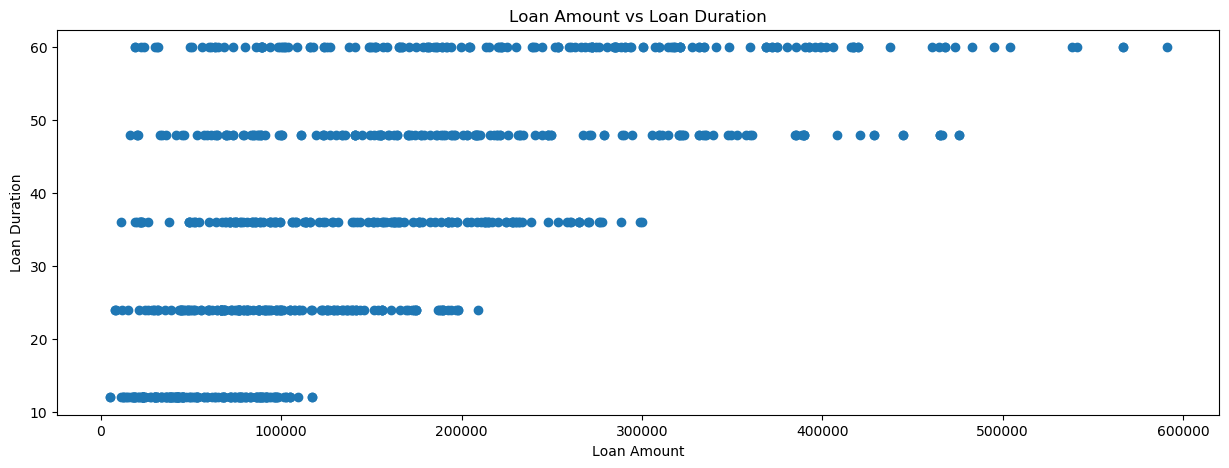

In [88]:
plt.figure(figsize=(15,5))
plt.scatter(basetable_final['loan_amount'], basetable_final['loan_duration'])
plt.title('Loan Amount vs Loan Duration')
plt.xlabel('Loan Amount')
plt.ylabel('Loan Duration')
plt.show() 

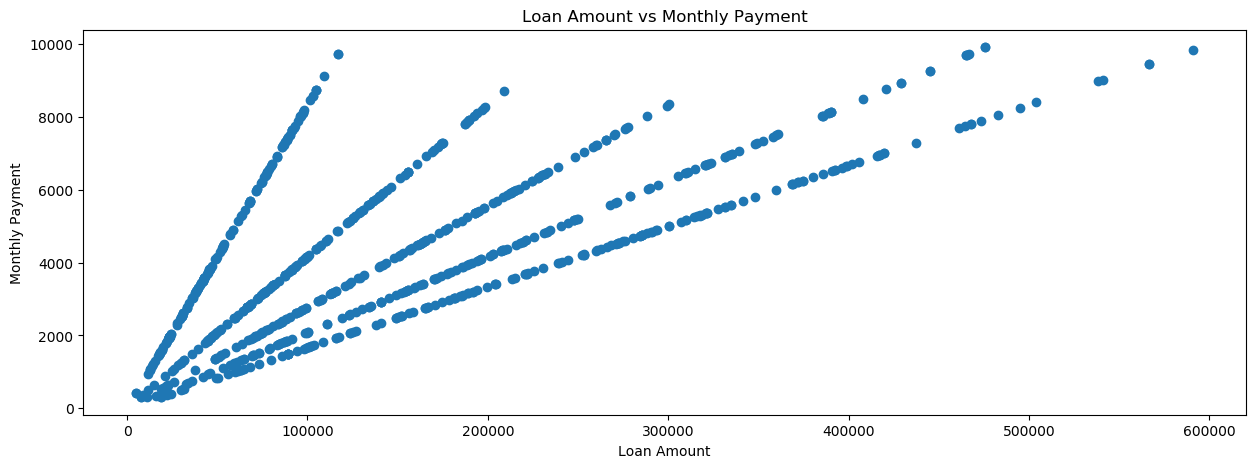

In [89]:
#Loan Amount vs Monthly Payment 
plt.figure(figsize=(15,5))
plt.scatter(basetable_final['loan_amount'], basetable_final['monthly_loan_payment'])
plt.title('Loan Amount vs Monthly Payment')
plt.xlabel('Loan Amount')
plt.ylabel('Monthly Payment')
plt.show() 

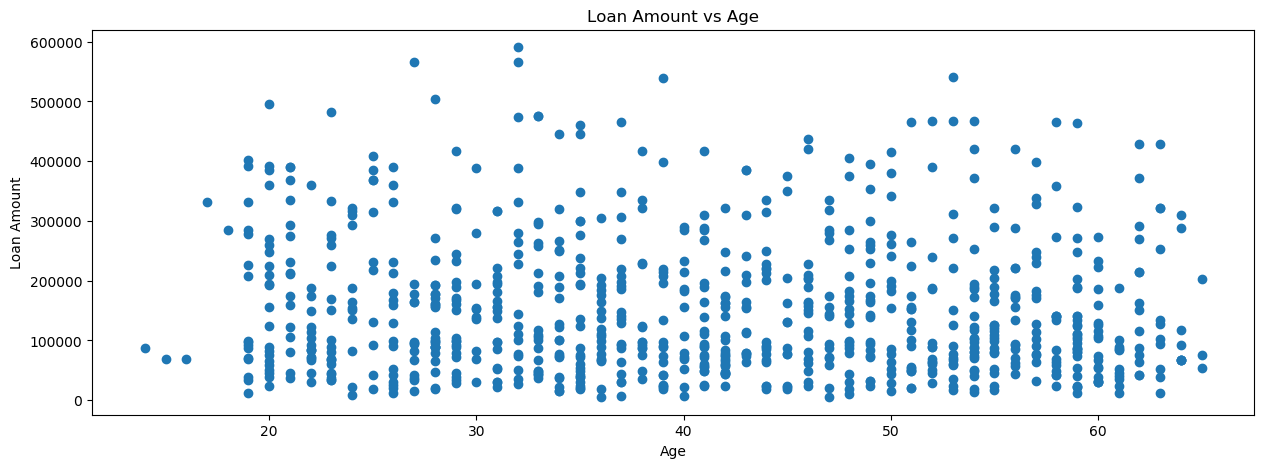

In [92]:
#Loan Amount vs Age
plt.figure(figsize=(15,5))
plt.scatter(basetable_final['client_age'], basetable_final['loan_amount'])
plt.title('Loan Amount vs Age')
plt.xlabel('Age')
plt.ylabel('Loan Amount')
plt.show() 